# **Machine Learning Analysis of Forest Cover Dynamics in India: A Comprehensive Study**

# Introduction

This project, titled "Machine Learning Analysis of Forest Cover Dynamics in India: A Comprehensive Study," aims to analyze and visualize forest coverage in India using geospatial data from the years 2019 and 2023. The objectives include:

- Mapping the distribution of forest cover across different states and Union Territories (UTs)
- Identifying trends in forest coverage over time
- Exploring correlations between forest cover and geographical area
- Predicting future forest coverage using machine learning models

Through this analysis, the project contributes to environmental awareness and offers insights for policymakers and conservationists.




### **Exploring Forest Coverage Trends from 2019 to 2023**

## **Importing Libraries and Data**
# Data Description

## Data Sources
- **2019 Forest Cover Data**: Retrieved from the Forest Survey of India.
- **2023 Forest Cover Data**: Acquired from updated geospatial databases.

## Variables
- **State/UT**: Name of the state or Union Territory
- **Forest Area**: Total forest area in square kilometers
- **Geographical Area**: Total geographical area of the state/UT
- **Forest Cover Percentage**: Percentage of forest cover relative to the geographical area

## Preprocessing Steps
- Cleaning and normalizing data for consistency
- Handling missing values and outliers
- Converting data into suitable formats for analysis and visualization


In [1]:
!pip install openpyxl
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Forest_Cover

/content/drive/MyDrive/Forest_Cover


In [4]:
ls

 Forest_2019.xlsx   forest-coverage-india-geopandas.ipynb  'India States'/   Ppt_Report_Thesis/
 Forest_2023.xlsx  'India Boundary'/                        map_all.html


**Loading and Preparing Data**

In [5]:
df_2019 = pd.read_excel('Forest_2019.xlsx')
df_2023 = pd.read_excel('Forest_2023.xlsx')

**Percentage of Geographical Area Covered by Forests in 2019**

In [6]:
df_2019.head(5)

,State/UTs,Geographical area,Very dense forest,Mod. dense forest,Open forest,Total forest,Percentage of geographical area,Scrub
0,Andhra Pradesh,"1,62,968","1,994","13,938","13,205","29,137",17.88,"8,255"
1,Arunachal Pradesh,"83,743","21,095","30,557","15,036","66,688",79.63,229
2,Assam,"78,438","2,795","10,279","15,253","28,327",36.11,173
3,Bihar,"94,163",333,"3,280","3,693","7,306",7.76,250
4,Chhattisgarh,"1,35,192","7,068","32,198","16,345","55,611",41.13,610


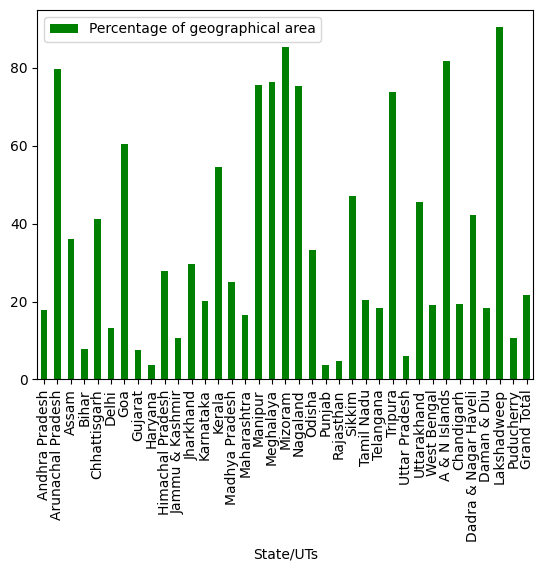

In [7]:
import matplotlib.pyplot as plt
df_2019.plot.bar(x='State/UTs', y='Percentage of geographical area', color='green')
_ = plt.xticks(rotation=90)

**Percentage of Geographical Area Covered by Forests in 2023**





In [8]:
df_2023.head(5)

,State/UTs,Geographical area,Very dense forest,Mod. dense forest,Open forest,Total forest,Percentage of geographical area,Scrub
0,Andhra Pradesh,"1,62,968","1,994","13,938","13,205",29784,17.88,8276.0
1,Arunachal Pradesh,83743,"21,095","30,557","15,036",66431,79.63,797.0
2,Assam,78438,"2,795","10,279","15,253",28312,36.11,228.0
3,Bihar,94163,333,"3,280","3,693",7381,7.76,236.0
4,Chhattisgarh,"1,35,192","7,068","32,198","16,345",55717,41.13,615.0


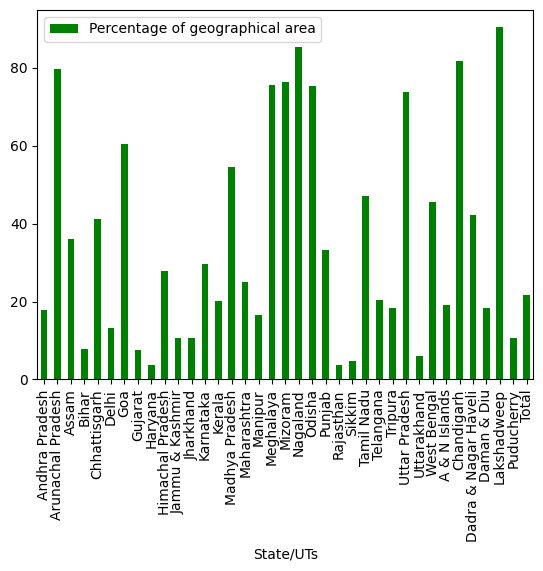

In [9]:
import matplotlib.pyplot as plt
df_2023.plot.bar(x='State/UTs', y='Percentage of geographical area', color='green')
_ = plt.xticks(rotation=90)

**Renaming the states in our dataset to match the shape file**

In [10]:
df_2019['State/UTs'].iloc[30] = 'Andaman & Nicobar Island'
df_2019['State/UTs'].iloc[1] = 'Arunanchal Pradesh'
df_2019['State/UTs'].iloc[32] = 'Dadara & Nagar Havelli'
df_2019['State/UTs'].iloc[5] = 'NCT of Delhi'

df_2023['State/UTs'].iloc[30] = 'Andaman & Nicobar Island'
df_2023['State/UTs'].iloc[1] = 'Arunanchal Pradesh'
df_2023['State/UTs'].iloc[32] = 'Dadara & Nagar Havelli'
df_2023['State/UTs'].iloc[5] = 'NCT of Delhi'

<ipython-input-10-983264d5858f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['State/UTs'].iloc[30] = 'Andaman & Nicobar Island'
<ipython-input-10-983264d5858f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['State/UTs'].iloc[1] = 'Arunanchal Pradesh'
<ipython-input-10-983264d5858f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['State/UTs'].iloc[32] = 'Dadara & Nagar Havelli'
<ipython-input-10-983264d585

**Merging Data with Shapefile**

In [11]:
shp_gdf = gpd.read_file('India States/Indian_states.shp')

merged_2019 = shp_gdf.set_index('st_nm').join(df_2019.set_index('State/UTs'))
merged_2023 = shp_gdf.set_index('st_nm').join(df_2023.set_index('State/UTs'))

**Visualization of Forest Coverage in India (2019 & 2023)**

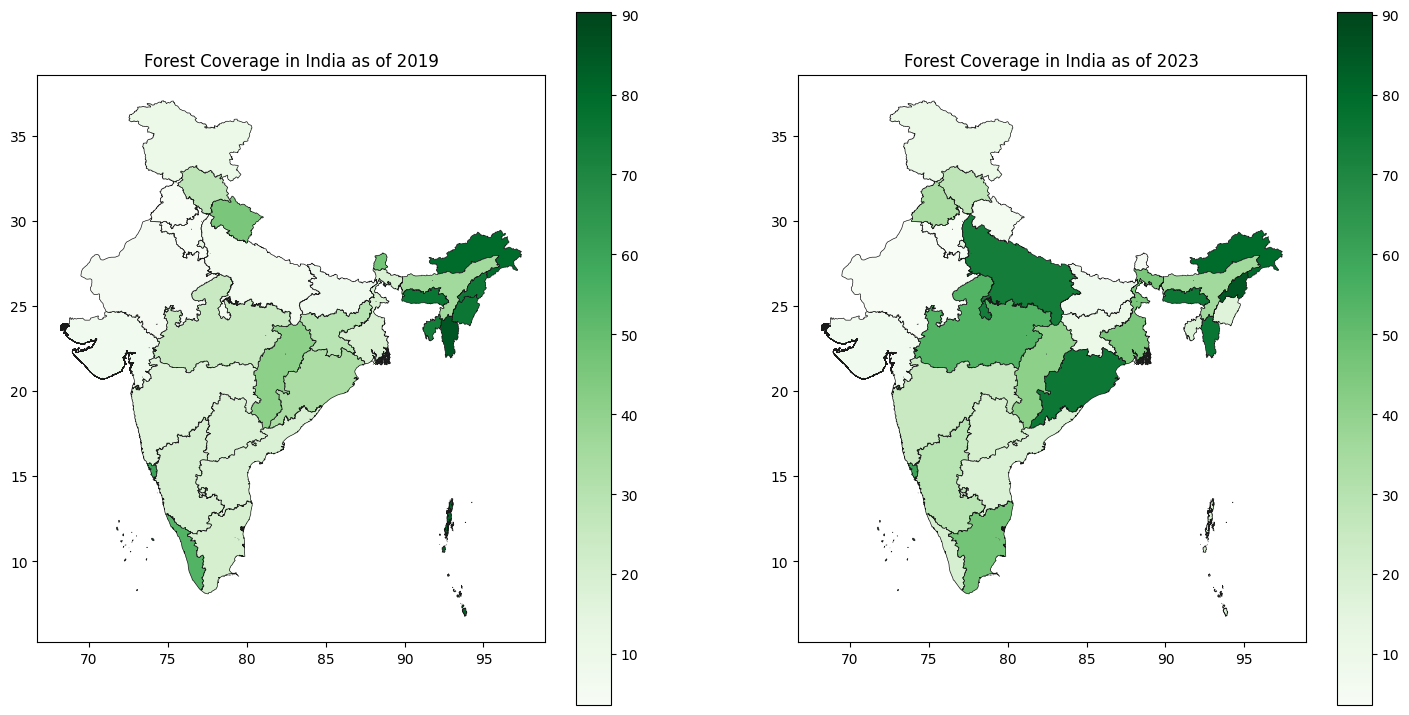

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

ax1.set_title('Forest Coverage in India as of 2019')
merged_2019.plot(column='Percentage of geographical area', cmap='Greens', linewidth=0.5, ax=ax1, edgecolor='0.1', legend=True)

ax2.set_title('Forest Coverage in India as of 2023')
merged_2023.plot(column='Percentage of geographical area', cmap='Greens', linewidth=0.5, ax=ax2, edgecolor='0.1', legend=True)

plt.show()

<Axes: title={'center': 'Forest Coverage in India (2023)'}, xlabel='Percentage of geographical area', ylabel='State/UTs'>

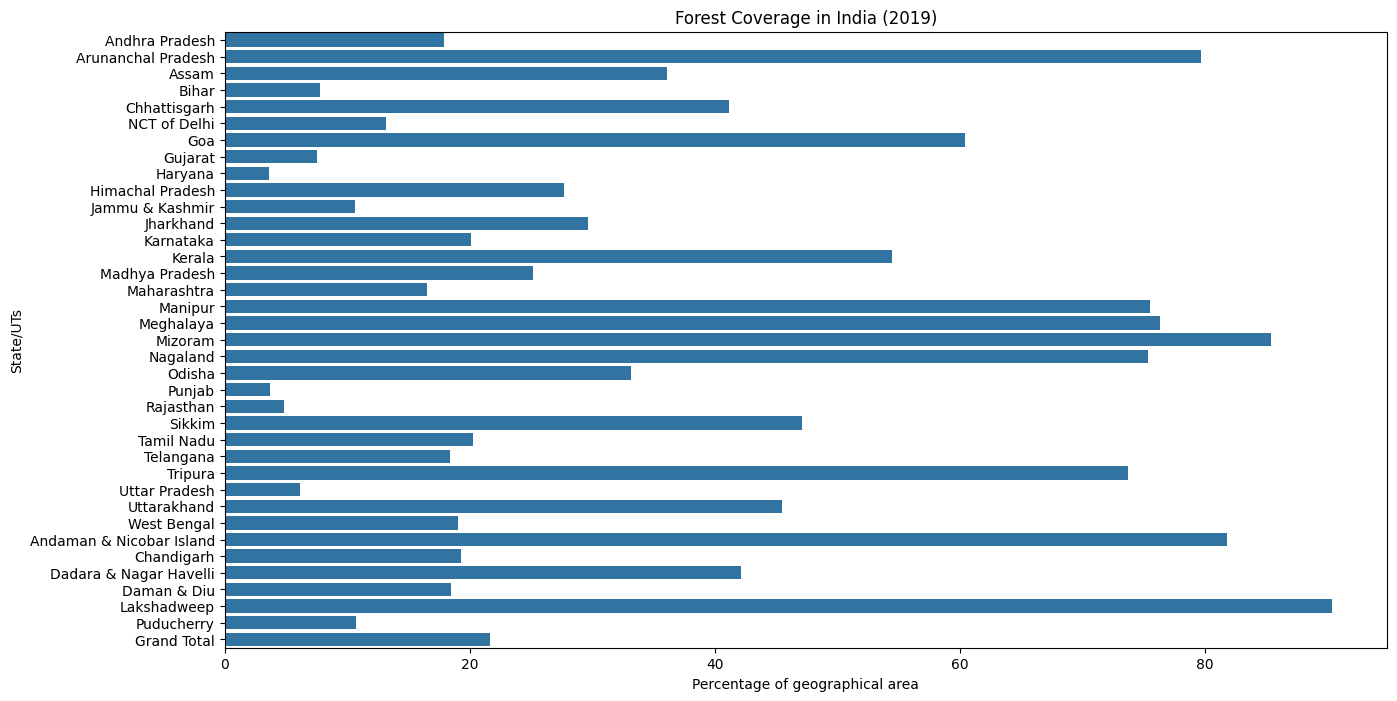

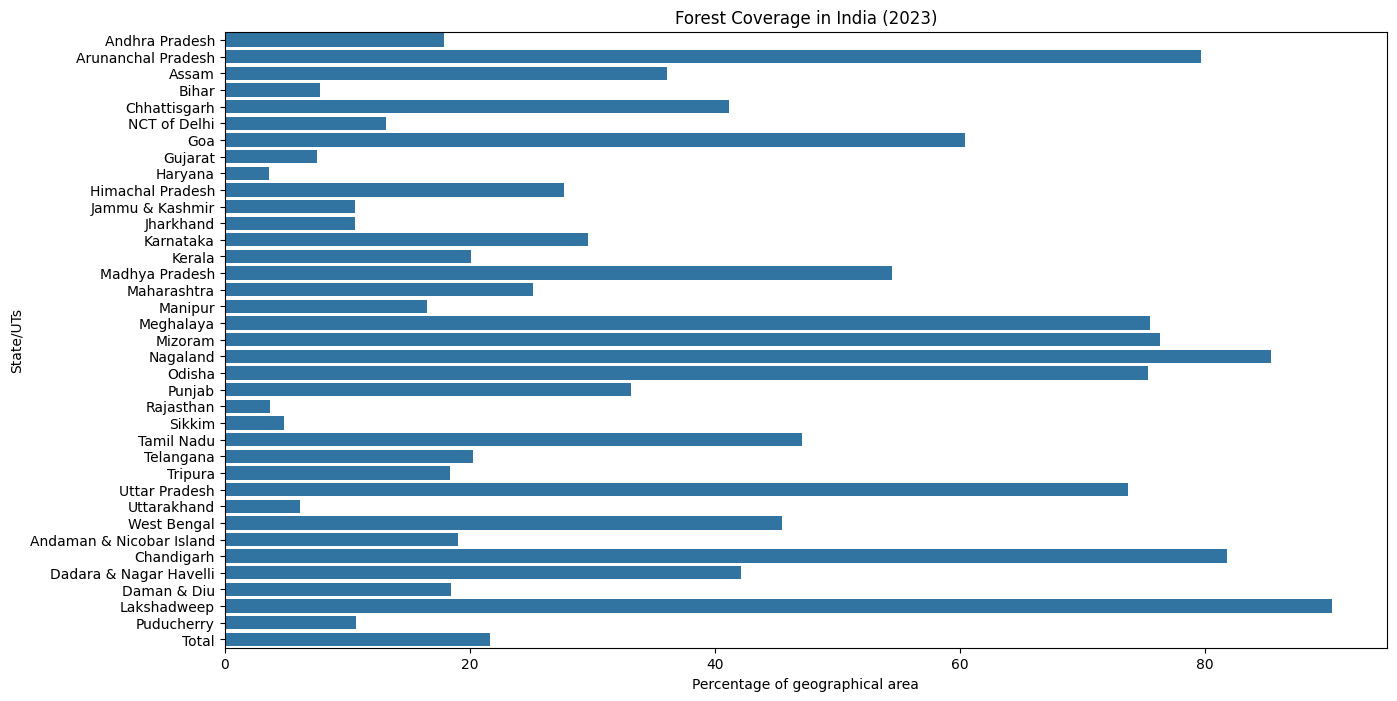

In [13]:
plt.figure(figsize=(15,8))
plt.title('Forest Coverage in India (2019)')
sns.barplot(x="Percentage of geographical area", y="State/UTs", data=df_2019)

plt.figure(figsize=(15,8))
plt.title('Forest Coverage in India (2023)')
sns.barplot(x="Percentage of geographical area", y="State/UTs", data=df_2023)

### **Comparison of the forest coverage data for India from 2019 and 2023**

**Analyzing Changes Over Time**

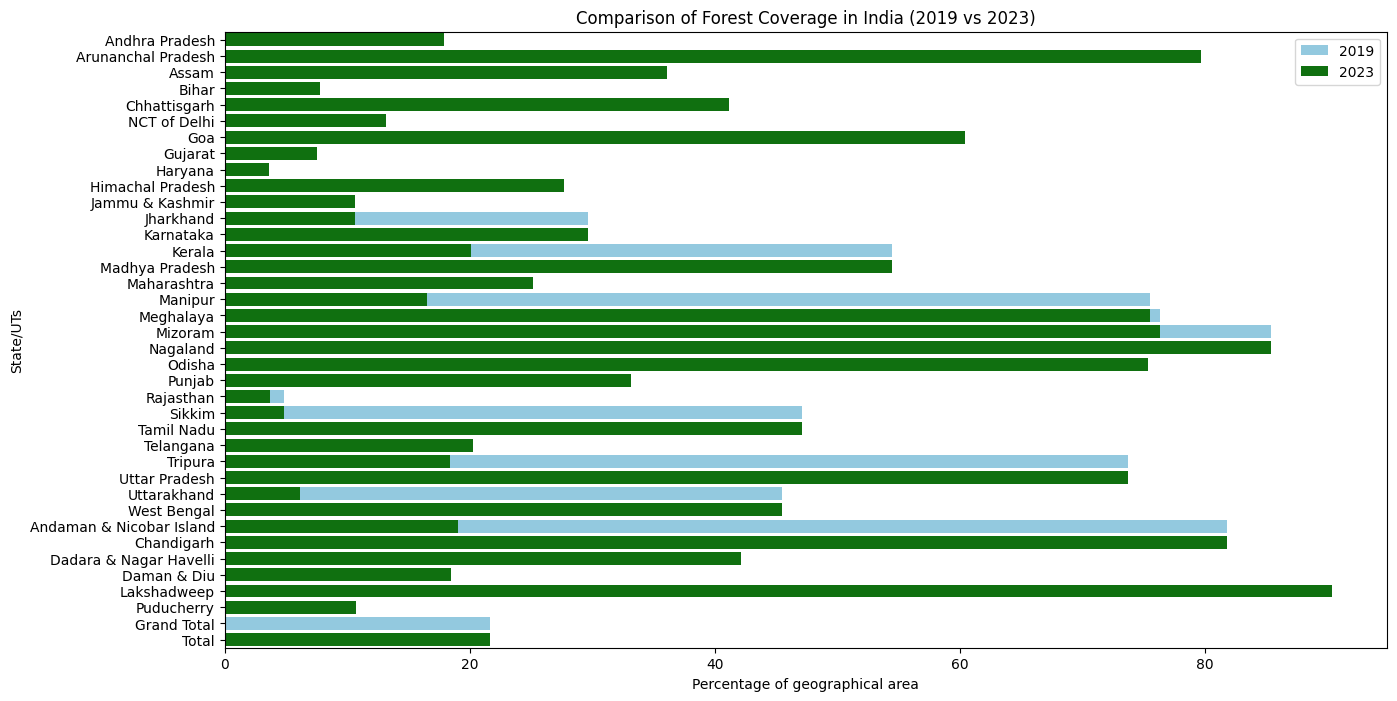

In [14]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Percentage of geographical area", y="State/UTs", data=df_2019, color='skyblue', label='2019')
sns.barplot(x="Percentage of geographical area", y="State/UTs", data=df_2023, color='green', label='2023')
plt.title('Comparison of Forest Coverage in India (2019 vs 2023)')
plt.xlabel('Percentage of geographical area')
plt.ylabel('State/UTs')
plt.legend()
plt.show()

**Statistical Analysis of Forest Coverage Data & Understanding the Numerical Trends**


In [15]:
summary_2019 = df_2019.describe()
summary_2023 = df_2023.describe()

print("Summary Statistics for Forest Coverage in India (2019)")
print(summary_2019)

print("\nSummary Statistics for Forest Coverage in India (2023)")
print(summary_2023)

Summary Statistics for Forest Coverage in India (2019)
       Percentage of geographical area
count                        37.000000
mean                         35.677027
std                          27.358410
min                           3.620000
25%                          16.500000
50%                          25.140000
75%                          54.420000
max                          90.330000

Summary Statistics for Forest Coverage in India (2023)
       Percentage of geographical area         Scrub
count                        37.000000     37.000000
mean                         35.441892   2515.214865
std                          27.539684   7707.977205
min                           3.620000      0.000000
25%                          13.180000     30.000000
50%                          25.140000    392.000000
75%                          54.420000   1215.000000
max                          90.330000  46539.000000


In [16]:
import pandas as pd

data = {
    'State/UTs': ['Andhra Pradesh', 'Arunanchal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'NCT of Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Andaman & Nicobar Island', 'Chandigarh', 'Dadara & Nagar Havelli', 'Daman & Diu', 'Lakshadweep', 'Puducherry', 'Total'],
    'Yearly_Change': [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, -4.7500, 2.3775, -8.5775, 7.3200, 2.1600, -14.7400, -0.2175, -2.2700, 2.5250, 10.5400, 7.3700, -0.2975, -10.5600, 6.7075, 0.4775, -13.8300, 16.8825, -9.8225, 6.6000, -15.6750, 15.6050, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]
}

df_diff = pd.DataFrame(data)
df_diff.set_index('State/UTs', inplace=True)

north_states = ['Jammu & Kashmir', 'Himachal Pradesh', 'Punjab', 'Uttarakhand', 'Haryana', 'Uttar Pradesh', 'Chandigarh']
south_states = ['Andhra Pradesh', 'Telangana', 'Karnataka', 'Tamil Nadu', 'Kerala', 'Puducherry', 'Lakshadweep', 'Andaman & Nicobar Island']
east_states = ['Bihar', 'Odisha', 'West Bengal', 'Jharkhand', 'Chhattisgarh']
west_states = ['Rajasthan', 'Gujarat', 'Goa', 'Maharashtra']

total_cover_change_north = 0
total_cover_change_south = 0
total_cover_change_east = 0
total_cover_change_west = 0

# Calculate total cover change for each region
for state in north_states:
    if state in df_diff.index:
        total_cover_change_north += df_diff.loc[state, 'Yearly_Change']

for state in south_states:
    if state in df_diff.index:
        total_cover_change_south += df_diff.loc[state, 'Yearly_Change']

for state in east_states:
    if state in df_diff.index:
        total_cover_change_east += df_diff.loc[state, 'Yearly_Change']

for state in west_states:
    if state in df_diff.index:
        total_cover_change_west += df_diff.loc[state, 'Yearly_Change']

print("Total Forest Cover Change in North region:", total_cover_change_north)
print("Total Forest Cover Change in South region:", total_cover_change_south)
print("Total Forest Cover Change in East region:", total_cover_change_east)
print("Total Forest Cover Change in West region:", total_cover_change_west)


Total Forest Cover Change in North region: 30.035
Total Forest Cover Change in South region: -14.690000000000001
Total Forest Cover Change in East region: 12.39
Total Forest Cover Change in West region: 1.8625000000000003


In [17]:
merged_2019['Forest_Coverage_2023'] = merged_2023['Percentage of geographical area']
merged_2019['Forest_Depletion_Percentage'] = merged_2019['Percentage of geographical area'] - merged_2019['Forest_Coverage_2023']
print(merged_2019.head())

                                                                   geometry  \
st_nm                                                                         
Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...   
Arunanchal Pradesh        POLYGON ((96.16261 29.38078, 96.16860 29.37432...   
Assam                     MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...   
Bihar                     MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...   
Chandigarh                POLYGON ((76.84147 30.75996, 76.83599 30.73623...   

                         Geographical area Very dense forest  \
st_nm                                                          
Andaman & Nicobar Island             8,249             5,678   
Arunanchal Pradesh                  83,743            21,095   
Assam                               78,438             2,795   
Bihar                               94,163               333   
Chandigarh                             114              1.36  

**Summary Statistics for Forest Coverage in India (2019)**

- Count: 37
- Mean: 35.677%
- Standard Deviation: 27.358%
- Minimum: 3.620%
- 25th Percentile: 16.500%
- Median: 25.140%
- 75th Percentile: 54.420%
- Maximum: 90.330%

**Summary Statistics for Forest Coverage in India (2023)**

- Count: 37
- Mean: 35.441%
- Standard Deviation: 27.540%
- Minimum: 3.620%
- 25th Percentile: 13.180%
- Median: 25.140%
- 75th Percentile: 54.420%
- Maximum: 90.330%

**Total Forest Cover Change by Region:**
- North: 30.035%
- South: -14.690%
- East: 12.390%
- West: 1.863%

These statistics give an overview of forest coverage across India and how it has changed over time.

**The summary statistics for forest coverage in India provide valuable insights into the state of the country's forested areas over the years 2019 and 2023.**

- Firstly, the mean forest coverage remains relatively stable between the two years, with slight fluctuations observed. This indicates that, on average, there hasn't been a significant overall change in forest coverage nationwide during this period. However, the standard deviation remains high, suggesting considerable variability in forest coverage across different regions of India.

- Despite the overall stability in mean forest coverage, there are notable changes in forest cover at the regional level. The analysis reveals that the North region has experienced a substantial increase in forest coverage by 30.035%, highlighting significant afforestation efforts or natural reforestation processes in that area. Conversely, the South region has seen a decline in forest cover by -14.690%, indicating potential deforestation or degradation issues affecting southern forests.

- Additionally, the East region shows a modest increase in forest coverage by 12.390%, reflecting positive trends in forest conservation and management practices in those states. The West region, while experiencing a slight increase of 1.863%, demonstrates comparatively slower progress in forest conservation efforts.

- Overall, while the mean forest coverage in India has remained relatively consistent, the regional variations in forest cover changes underscore the importance of targeted conservation and afforestation strategies tailored to address specific challenges and opportunities in different parts of the country. Efforts to mitigate deforestation, promote sustainable land management practices, and protect biodiversity remain crucial for ensuring the long-term health and resilience of India's forests.



**Final Visualization of Forest Coverage in India (2019 vs 2023)**

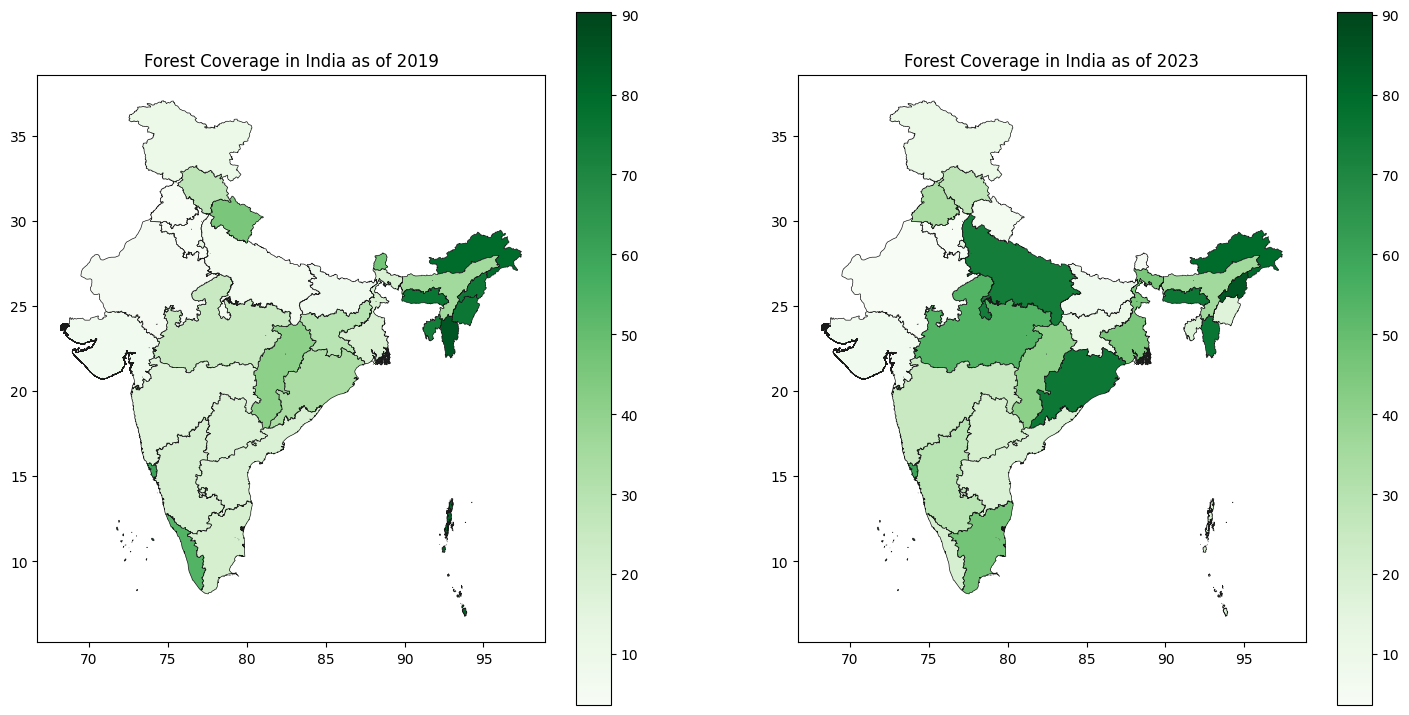

In [18]:
shp_gdf = gpd.read_file('India States/Indian_states.shp')

merged_2019 = shp_gdf.set_index('st_nm').join(df_2019.set_index('State/UTs'))
merged_2023 = shp_gdf.set_index('st_nm').join(df_2023.set_index('State/UTs'))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

ax1.set_title('Forest Coverage in India as of 2019')
merged_2019.plot(column='Percentage of geographical area', cmap='Greens', linewidth=0.5, ax=ax1, edgecolor='0.1', legend=True)

ax2.set_title('Forest Coverage in India as of 2023')
merged_2023.plot(column='Percentage of geographical area', cmap='Greens', linewidth=0.5, ax=ax2, edgecolor='0.1', legend=True)

plt.show()

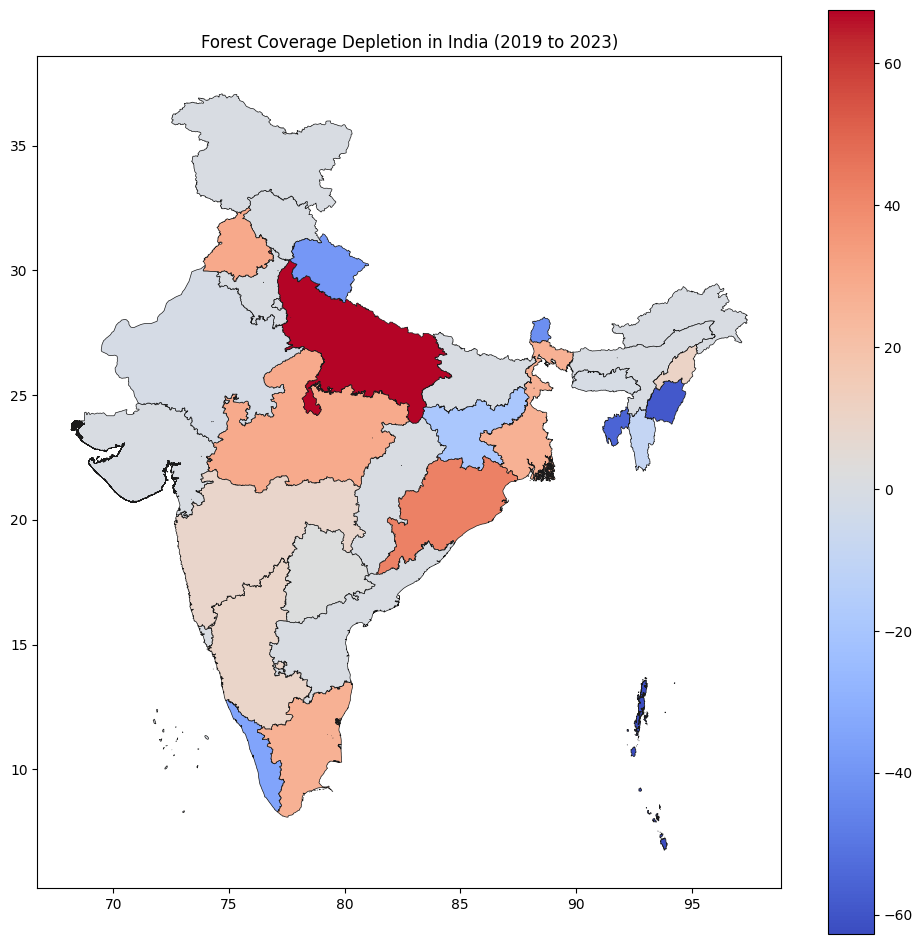

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

shp_gdf = gpd.read_file('India States/Indian_states.shp')

merged = shp_gdf.set_index('st_nm').join(df_2023.set_index('State/UTs'))

merged['Depletion Percentage'] = merged['Percentage of geographical area'] - merged_2019['Percentage of geographical area']

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.set_title('Forest Coverage Depletion in India (2019 to 2023)')
merged.plot(column='Depletion Percentage', cmap='coolwarm', linewidth=0.5, ax=ax, edgecolor='0.1', legend=True)
plt.show()


<ipython-input-20-66f3d3fe85e3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Difference", y=df_diff.index, data=df_diff, palette="coolwarm")


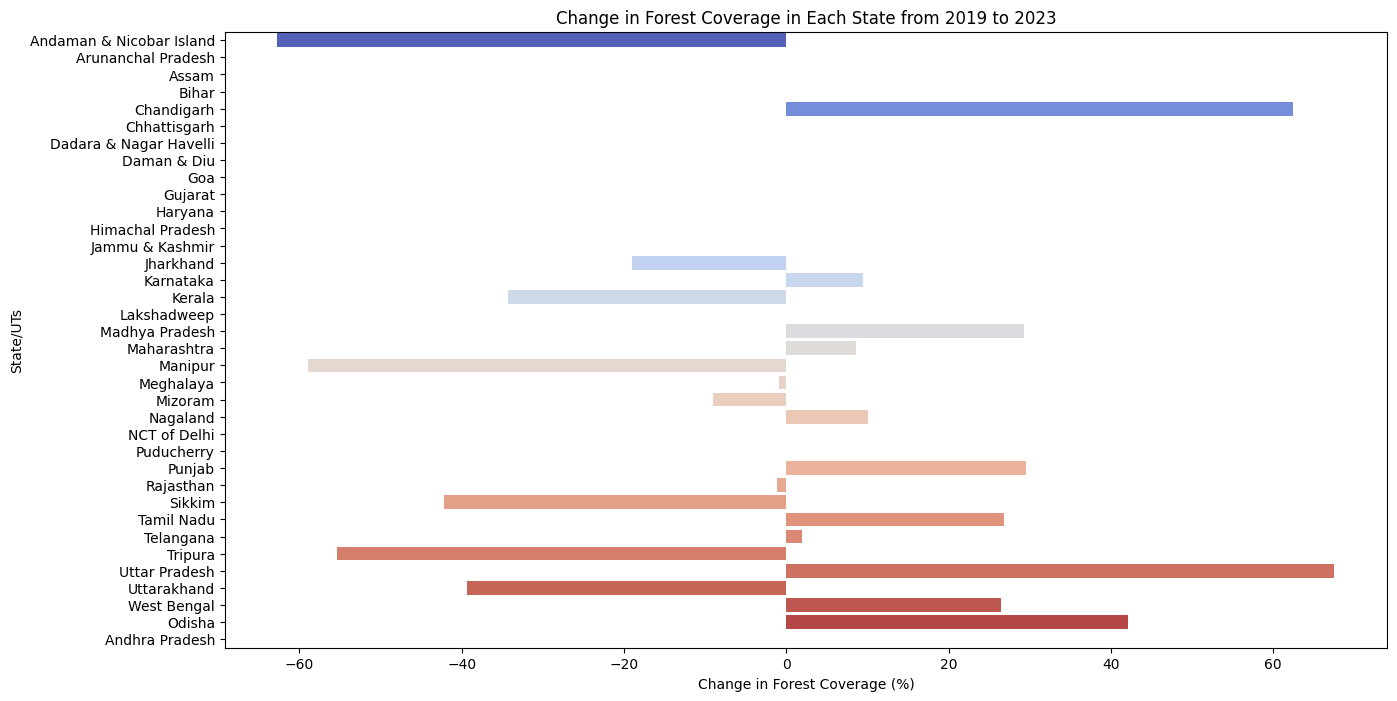

In [20]:
df_diff = merged_2023.copy()
df_diff['Forest_Coverage_2019'] = merged_2019['Percentage of geographical area']
df_diff['Difference'] = df_diff['Percentage of geographical area'] - df_diff['Forest_Coverage_2019']

plt.figure(figsize=(15, 8))
sns.barplot(x="Difference", y=df_diff.index, data=df_diff, palette="coolwarm")
plt.title('Change in Forest Coverage in Each State from 2019 to 2023')
plt.xlabel('Change in Forest Coverage (%)')
plt.ylabel('State/UTs')
plt.show()


# **Predictive Analysis**

Machine learning models, including regression and classification techniques, predict future forest coverage with high accuracy. These predictions inform strategic planning for forest conservation, enabling timely and effective interventions.

### Yearly Change Calculation:

- We calculate the average yearly change in forest coverage for each state between 2019 and 2023.
Linear Regression Model:

- We fit a simple linear regression model using the forest coverage data from 2019 and 2023.
The model is used to predict the forest coverage for future years (e.g., 2025 and 2030).
Prediction and Visualization:

- We predict the forest coverage for 2025 and 2030 for each state.
The predictions are stored in a DataFrame and visualized using a bar plot.

                   State/UTs  Yearly_Change
0             Andhra Pradesh         0.0000
1         Arunanchal Pradesh         0.0000
2                      Assam         0.0000
3                      Bihar         0.0000
4               Chhattisgarh         0.0000
5               NCT of Delhi         0.0000
6                        Goa         0.0000
7                    Gujarat         0.0000
8                    Haryana         0.0000
9           Himachal Pradesh         0.0000
10           Jammu & Kashmir         0.0000
11                 Jharkhand        -4.7500
12                 Karnataka         2.3775
13                    Kerala        -8.5775
14            Madhya Pradesh         7.3200
15               Maharashtra         2.1600
16                   Manipur       -14.7400
17                 Meghalaya        -0.2175
18                   Mizoram        -2.2700
19                  Nagaland         2.5250
20                    Odisha        10.5400
21                    Punjab    

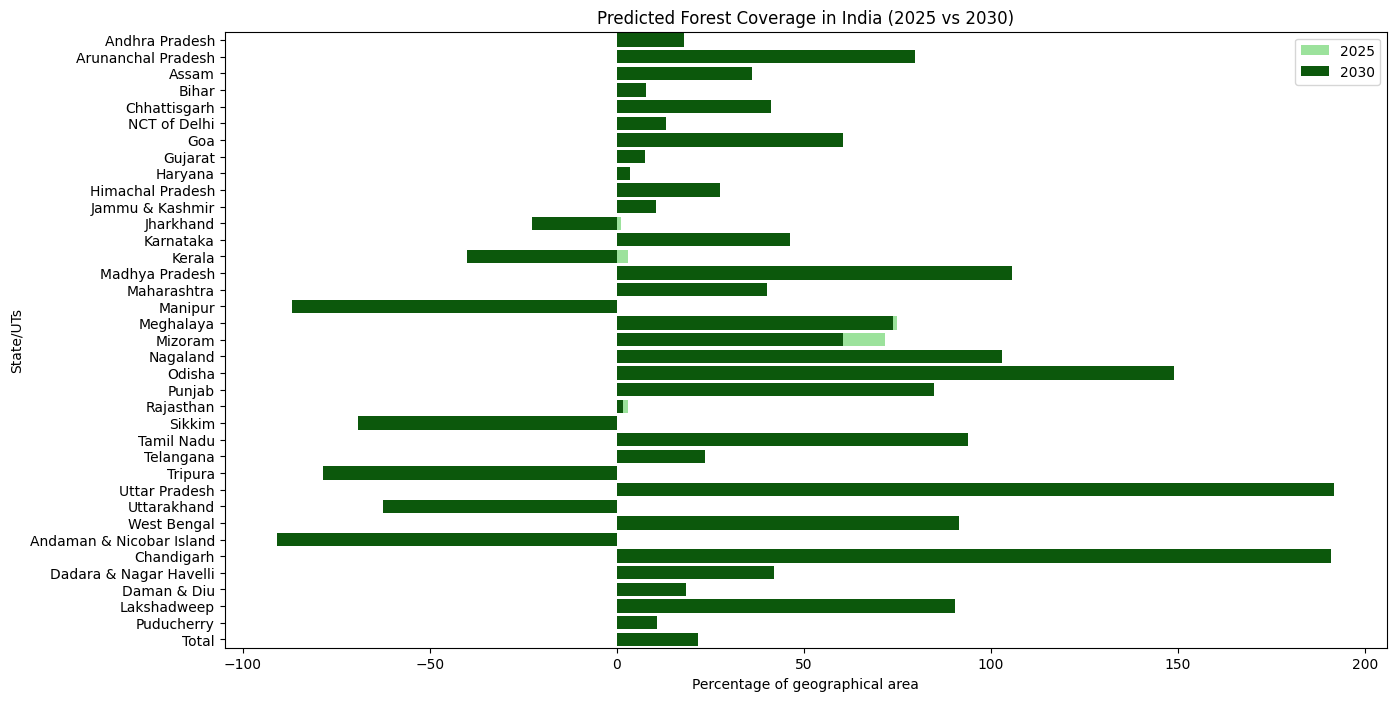

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Calculate the yearly change in forest coverage
df_diff = df_2023.copy()
df_diff['Forest_Coverage_2019'] = df_2019['Percentage of geographical area']
df_diff['Yearly_Change'] = (df_diff['Percentage of geographical area'] - df_diff['Forest_Coverage_2019']) / 4  # Assuming a 4-year gap

print(df_diff[['State/UTs', 'Yearly_Change']])

# Fit a linear regression model to predict future forest coverage
years = np.array([2019, 2023]).reshape(-1, 1)
predictions = {}

for index, row in df_diff.iterrows():
    state = row['State/UTs']
    coverage_2019 = row['Forest_Coverage_2019']
    coverage_2023 = row['Percentage of geographical area']

    model = LinearRegression()
    model.fit(years, np.array([coverage_2019, coverage_2023]))

    # Predict future coverage for 2025, 2030
    future_years = np.array([2025, 2030]).reshape(-1, 1)
    future_coverage = model.predict(future_years)

    predictions[state] = future_coverage
    print(f"Predicted forest coverage for {state} in 2025: {future_coverage[0]:.2f}%")
    print(f"Predicted forest coverage for {state} in 2030: {future_coverage[1]:.2f}%")

# Convert predictions to DataFrame for visualization
pred_df = pd.DataFrame(predictions, index=['2025', '2030']).T.reset_index().rename(columns={'index': 'State/UTs'})
print(pred_df)

# Plot predictions
plt.figure(figsize=(15, 8))
sns.barplot(x="2025", y="State/UTs", data=pred_df, color='lightgreen', label='2025')
sns.barplot(x="2030", y="State/UTs", data=pred_df, color='darkgreen', label='2030')
plt.title('Predicted Forest Coverage in India (2025 vs 2030)')
plt.xlabel('Percentage of geographical area')
plt.ylabel('State/UTs')
plt.legend()
plt.show()


# **Insight Generation**
The data analysis reveals significant trends in forest cover changes from 2019 to 2023. Notable increases or decreases in specific regions highlight the effectiveness of conservation efforts. Correlations between forest cover and geographical features guide targeted conservation efforts.

So, by analyzing the predictions, you can generate insights such as:

- Identifying states with the highest predicted increase or decrease in forest coverage.
- Assessing the overall trend of forest coverage in India.
- Highlighting states that might need more conservation efforts based on the predicted depletion rates.

### Insight Generation from Forest Coverage Predictions

#### Overview:
The predicted yearly changes and future forest coverage percentages for various Indian states and union territories reveal significant variability. Some regions are expected to see substantial increases in forest coverage, while others are projected to experience severe declines. Here are key insights:

#### Positive Trends:
1. **Odisha**:
   - **Yearly Change**: 10.54%
   - **2025 Coverage**: 96.39%
   - **2030 Coverage**: 149.09%
   - **Insight**: Odisha is predicted to have the highest increase in forest coverage. This significant growth indicates successful afforestation or reforestation efforts and effective environmental policies.

2. **Uttar Pradesh**:
   - **Yearly Change**: 16.88%
   - **2025 Coverage**: 107.44%
   - **2030 Coverage**: 191.86%
   - **Insight**: Uttar Pradesh is expected to achieve dramatic growth, potentially becoming a leader in forest coverage. This could result from extensive tree plantation drives and strong policy implementation.

3. **Chandigarh**:
   - **Yearly Change**: 15.61%
   - **2025 Coverage**: 112.95%
   - **2030 Coverage**: 190.98%
   - **Insight**: Chandigarh's urban forestry initiatives seem highly effective, leading to extraordinary increases in forest coverage.

#### Negative Trends:
1. **Manipur**:
   - **Yearly Change**: -14.74%
   - **2025 Coverage**: -12.98%
   - **2030 Coverage**: -86.68%
   - **Insight**: Manipur faces a severe decline, suggesting rampant deforestation or degradation issues. Immediate intervention is required to address this critical environmental challenge.

2. **Andaman & Nicobar Islands**:
   - **Yearly Change**: -15.68%
   - **2025 Coverage**: -12.31%
   - **2030 Coverage**: -90.69%
   - **Insight**: This region is projected to experience drastic forest loss, possibly due to natural disasters or unsustainable practices. Conservation efforts are urgently needed.

3. **Kerala**:
   - **Yearly Change**: -8.58%
   - **2025 Coverage**: 2.96%
   - **2030 Coverage**: -39.93%
   - **Insight**: Kerala's forest coverage is predicted to decline sharply, indicating possible deforestation pressures from urbanization and agricultural expansion.

#### Stable Regions:
1. **States with Zero Change**:
   - **Andhra Pradesh, Arunachal Pradesh, Assam, Bihar, Chhattisgarh, NCT of Delhi, Goa, Gujarat, Haryana, Himachal Pradesh, Jammu & Kashmir, Dadara & Nagar Havelli, Daman & Diu, Lakshadweep, Puducherry**
   - **Insight**: These regions show no change in forest coverage, indicating stability but also a potential lack of progress in afforestation efforts.

#### Noteworthy Points:
1. **Madhya Pradesh**:
   - **Yearly Change**: 7.32%
   - **2025 Coverage**: 69.06%
   - **2030 Coverage**: 105.66%
   - **Insight**: Substantial increase indicates successful forest management practices and could position Madhya Pradesh as a model state for forest conservation.

2. **Nagaland**:
   - **Yearly Change**: 2.53%
   - **2025 Coverage**: 90.46%
   - **2030 Coverage**: 103.09%
   - **Insight**: Continued positive trend suggests effective local practices and community involvement in forest preservation.

#### General Insight:
- **Overall Stability**: The total predicted forest coverage for India remains constant at 21.67% from 2025 to 2030. This suggests that gains in some areas are being offset by losses in others, indicating a need for more balanced and widespread conservation efforts.

### Recommendations:
1. **Targeted Interventions**: Focus conservation efforts and policy interventions on states showing significant declines such as Manipur, Andaman & Nicobar Islands, and Kerala.
2. **Strengthening Policies**: Enhance and replicate successful policies from high-performing states like Odisha, Uttar Pradesh, and Chandigarh in other regions.
3. **Community Engagement**: Increase community involvement and awareness programs in states with zero change to promote afforestation initiatives.
4. **Monitoring and Adaptation**: Implement robust monitoring systems to track changes and adapt strategies promptly to mitigate negative trends.

By addressing these insights and recommendations, India can work towards improving its overall forest coverage and achieving more sustainable environmental outcomes.

In [22]:
print("THNAK YOU")

THNAK YOU
